In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rollno = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ht = [155, 166, 169, 158, 160, 172, 159, 162, 170, 174]
df = pd.DataFrame(zip(rollno, ht), columns=['RollNo', 'Ht'])
df

,RollNo,Ht
0,1,155
1,2,166
2,3,169
3,4,158
4,5,160
5,6,172
6,7,159
7,8,162
8,9,170
9,10,174


<Axes: xlabel='RollNo', ylabel='Ht'>

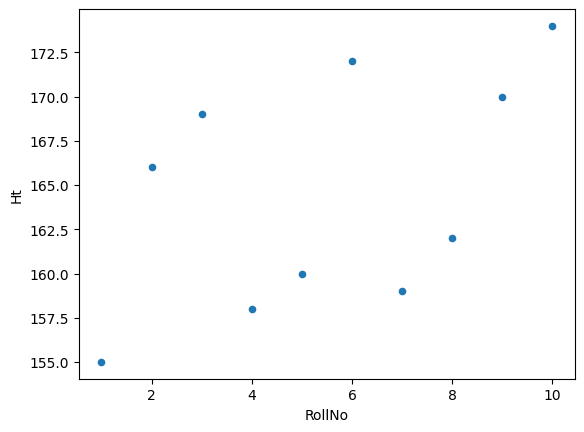

In [4]:
df.plot.scatter('RollNo', 'Ht')

In [5]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,6,1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
df_wcss =  pd.DataFrame(zip(range(1,6), wcss), columns=['k', 'wcss'])


In [6]:
df_wcss

,k,wcss
0,1,471.000000
1,2,152.250000
2,3,105.550000
3,4,40.416667
4,5,28.333333


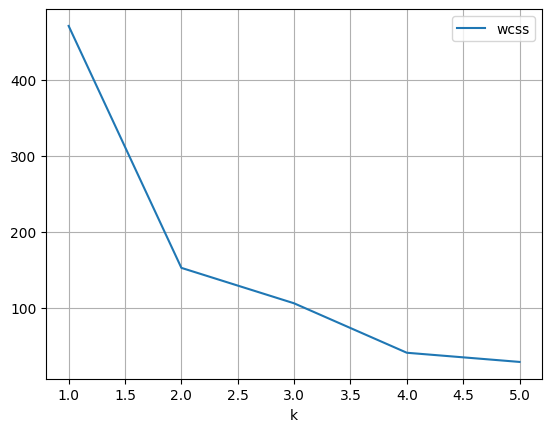

In [7]:
df_wcss.plot.line('k', 'wcss')
plt.grid()


## Hence k should be 2 ,, else 4

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df)


KMeans(n_clusters=2)

In [12]:
y = kmeans.predict(df)
kmeans.cluster_centers_

array([[  4.5 , 160.  ],
       [  7.  , 171.25]])

In [10]:
df_pred = df.copy()
df_pred['cluster'] = y

,RollNo,Ht,cluster
0,1,155,0
1,2,166,0
2,3,169,1
3,4,158,0
4,5,160,0
5,6,172,1
6,7,159,0
7,8,162,0
8,9,170,1
9,10,174,1


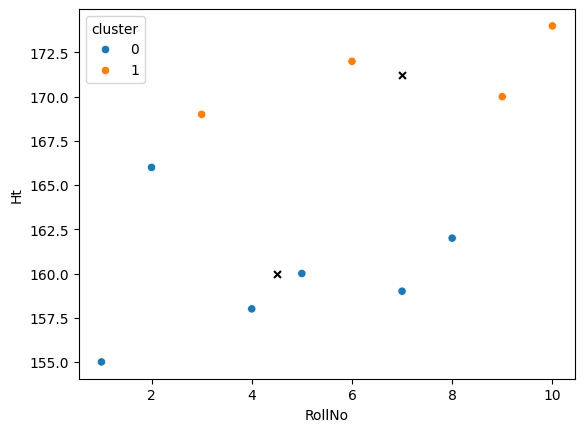

In [18]:
import seaborn as sns
centroids = kmeans.cluster_centers_
sns.scatterplot(x = 'RollNo', y ='Ht', data = df_pred, hue = 'cluster');
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=25, c='black')